# Statistical tests

6 August 2021

---

## Types of data

| Type of data | Description | Example | 
| :-- | :-- | --: |
| Ratio scale | Statements such as 'This is twice that' have meaning | Heights of people |
| Interval scale | Distance between points has a meaning but not ratio | Temperatue in (C) |
| Ordinal | Values can be ranked but differences have no meaning | Star rating of films |
| Ordered nominal scale | Order but not numeric | "Excellent", "Average", "Terrible" |
| Nominal scale | Categories but cannot be ordered | Eye colour |
| Dichotomous | Binary variables | Survived vs died |


## Summary of tests and their applicability


| Type of data | Size of sample | Method |
| -- | -- | -- |
| Interval | Large, > 50 each sample | Normal distribution for means

## Some questions
- Comparing star ratings on interview reviews for different products with different numbers of reviews
    - E.g., one printer has an average star rating of 3.5 with 250 review and another of 4 with 100 reviews. Which would be better?
- Comparing distributions from data quality assessments
    - E.g., distributions of character length in triage texts. How many needed to detect a given difference which probabilit $\alpha$? (rephrase)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline
sns.set()

## Z-test

Generate some data: 
- two normal distributions with different means but the same variance

In [3]:
sample_size1 = 100
sample_size2 = 128

In [23]:
y1 = 1*np.random.randn(sample_size1)
y2 = 1.5*np.random.randn(sample_size2) + 0.1

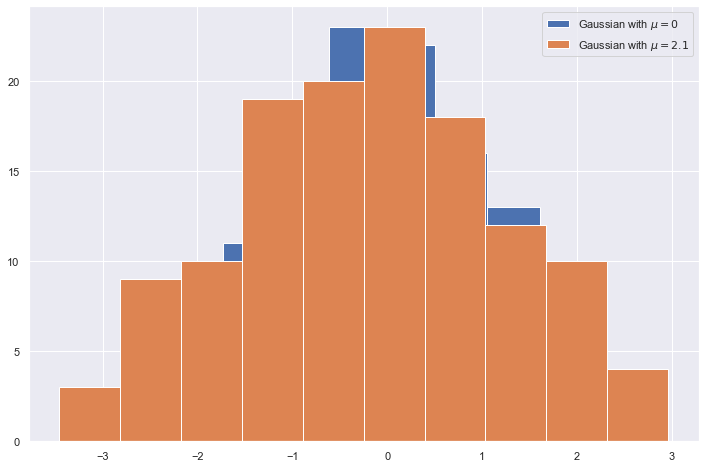

In [24]:
plt.figure(figsize=(12, 8))
plt.hist(y1, label='Gaussian with $\mu=0$')
plt.hist(y2, label='Gaussian with $\mu=2.1$')
plt.legend()
plt.show()

In [25]:
sample_mean1 = y1.mean()
sample_mean2 = y2.mean()

sample_var1 = np.sum((y1 - sample_mean1)**2) / (sample_size1-1)
sample_var2 = np.sum((y2 - sample_mean2)**2) / (sample_size2-1)

In [26]:
sample_mean1, sample_mean2

(0.08261603681169795, -0.18543070194613556)

In [27]:
sample_var1, sample_var2

(1.0536387616498897, 1.974192331689587)

In [28]:
# z-statistic
# test that the second set of samples has mean=2.1
z = (sample_mean2 - 0) / np.sqrt(sample_var2)

# calcualte the p value based on this z-value
# the probability that a value at least as large as this value would occur under the null hypothesis
p = 1 - norm.cdf(z)

print(z, p)

-0.13197355392632956 0.5524973951667611


### Difference between two populations

In [29]:
# difference between sample means
mean_diff = sample_mean1 - sample_mean2

In [30]:
# standard error of the mean of a given sample
sample_var1 = np.sum((y1 - sample_mean1)**2) / (sample_size1-1)

In [31]:
# standard error in the difference of means
sem_diff = np.sqrt(sample_var1 / sample_size1 + sample_var2 / sample_size2)

In [32]:
# 95% confidence interval
lower_bound = mean_diff - 1.96 * sem_diff
upper_bound = mean_diff + 1.96 * sem_diff

lower_bound, upper_bound

(-0.04774913522150759, 0.5838426127371746)

In [33]:
# z-statistic for difference between two means
z = (sample_mean1 - sample_mean2) / (sem_diff)

In [35]:
z

1.6636430405031915

## Comparing proportions

In [121]:
from scipy.stats import binom
from numpy.random import choice

# example
# estimating the proportion of the Australian population who like cats
sample_size = 100
num_samples = 10000
num_cat_lovers = 8821

proportion = num_cat_lovers / population

In [122]:
# generate the samples
data = choice(2, [sample_size, num_samples], p=[1-proportion, proportion])

In [123]:
sample_proportions = data.mean(axis=0)

In [133]:
# a given sample proportion and sample standard deviation
sample_prop = sample_proportions[3]
sample_var = sample_prop * (1 - sample_prop) / sample_size

In [137]:
# large sample size -> approximate the distribution as normal
lower_bound = sample_prop - 1.96 * np.sqrt(sample_var)
upper_bound = sample_prop + 1.96 * np.sqrt(sample_var)

lower_bound, upper_bound

(0.8163075389076541, 0.943692461092346)

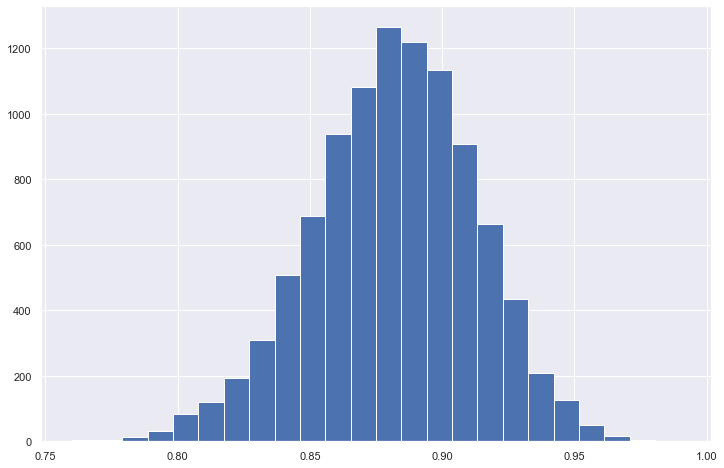

In [126]:
# calculate the proportion for each sample
plt.figure(figsize=(12, 8))
plt.hist(sample_proportions, bins=24)
plt.show()

## Bootstrap intervals

In [192]:
data_one_sample = data[:, 0]
bootstrap_samples = np.random.choice(data_one_sample, [100, 100000])
bootstrap_proportions = bootstrap_samples.mean(axis=0)

In [193]:
bootstrap_var = bootstrap_proportions.var()
bootstrap_mean = bootstrap_proportions.mean()

In [197]:
lower_bound = bootstrap_mean - np.sqrt(bootstrap_var) * 1.96
upper_bound = bootstrap_mean + np.sqrt(bootstrap_var) * 1.96

In [198]:
lower_bound, upper_bound

(0.7920288183344376, 0.9280567816655624)

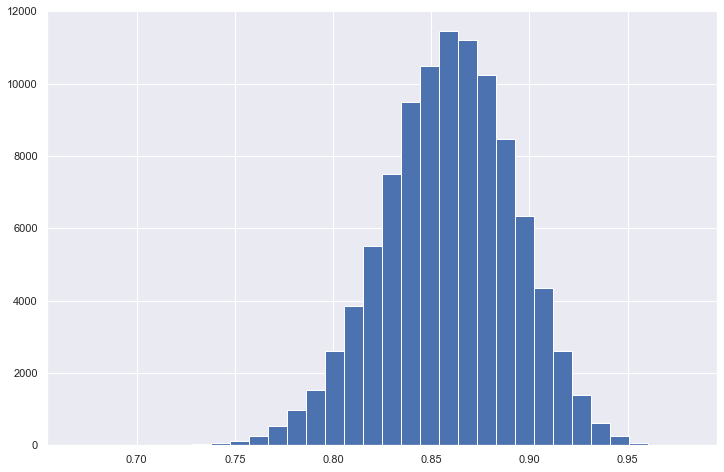

In [196]:
# calculate the proportion for each sample
plt.figure(figsize=(12, 8))
plt.hist(bootstrap_proportions, bins=32)
plt.show()

## One-sided t test

Assumptions:
- if $x_1, x_2, x_3, ..., x_n$ from a Normal distribution ~ $N(\mu, \sigma^2)$
- $\bar{x}$ is the sample mean and $\mu$ the population mean
- $s^2$ is the sample variance

Then:
- $t = (\bar{x} - \mu) / \sqrt{s^2/n}$ follows a t-distribution with n-1 degrees of freedom


Tests for Normality:
- adf

## Two-sided t test

## Sign test

## F-test

## Mann-Whitney U test

Given two sets of data:
- ${a_1, a_2, a_3, ..., a_n}$
- ${b_1, b_2, b_3, ..., b_m}$

statistic U / (n * m) gives an estimate of the probability that a element drawn at random from population A exceeds an element drawn randomly from B

Assumptions
- Data can be ranked
- Observations are independent

In [208]:
from scipy.stats import mannwhitneyu

A = [7, 4, 9, 17]
B = [11, 6, 21, 14]

In [203]:
# sort A
A.sort()

# sort B
B.sort()

In [207]:
# algorithm
# sort A ascending
# sort B ascending


# start with a_0 = A[0] and b_0 = B[0]
# x_0 = min(a_0, b_0)
# ...
# end up with a list of A's and B's corresponding to ranks of the combined set

# for each A
# count the number of B's that preceed it (if there are ties then count as 0.5)
# sum these counts -> U

# U / (n_1 * n_2) the probabilistic interpretation above

In [210]:
mannwhitneyu(A, B)

MannwhitneyuResult(statistic=5.0, pvalue=0.4857142857142857)

## Wilcoxon matched pairs test

Given two sets of data:
- ${a_1, a_2, a_3, ..., a_n}$
- ${b_1, b_2, b_3, ..., b_n}$

Assumptions:
- Interval data

Method:
- Then find differences between each of the pairs.
- Rank differences between pairs by absolute value of difference (ties are given the average of their ranks)
- Sum the ranks of the positive differences, sum the ranks of the negative differences
- Under null hypothesis: these sums should be approximately equal
- Test statistic: the smaller of these

In [213]:
from scipy.stats import wilcoxon

d = [0.1, -0.5, -0.7, -1.5, 0.3, 0.4, -1.7, -2]

In [217]:
wilcoxon(d)

WilcoxonResult(statistic=6.0, pvalue=0.109375)

## Spearman's rank correlation coefficient

- Rank the two datasets
- Look at the differences between corresponding ranks $d_i$


Then calculate:

$\rho = \frac{Cov(rank_x, rank_y)}{\sigma(rank_x)\sigma(rank_y)}$

In [218]:
from scipy.stats import spearmanr

## Kendall's rank correlation coefficient

- Useful for testing the strength of the correlation between ranked variables
- Harder to compute than Spearman's r

Given sets of data
- $x_1, x_2, ..., x_n$
- $y_1, y_2, ..., y_n$

Concordant pair:
- $(x_i, x_j)$ and $(y_i, y_j)$ ordered the same way

Discordant pair:
- $(x_i, x_j)$ and $(y_i, y_j)$ ordered different ways

In [226]:
from scipy.stats import kendalltau

# example from section 8.9 of 'introduction to medical statistics'
r1 = np.arange(1, 18)
r2 = [3, 7, 6, 1, 13, 10, 8, 4, 16, 9, 11, 14, 12, 17, 5, 2, 15]

In [229]:
kendalltau(r1, r2)

KendalltauResult(correlation=0.2941176470588235, pvalue=0.10886459480774507)

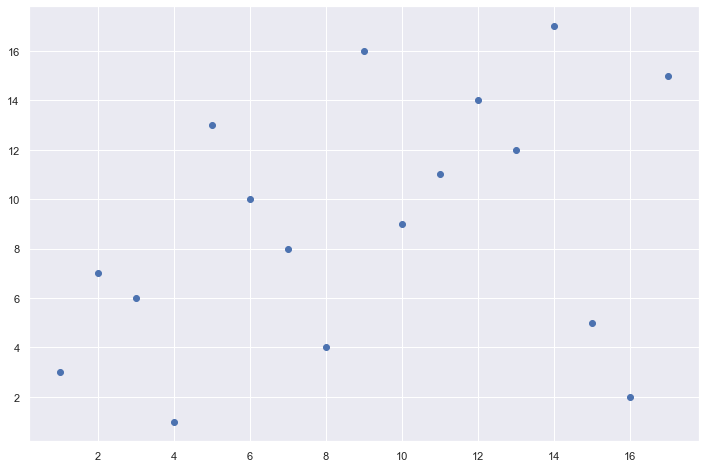

In [230]:
plt.figure(figsize=(12, 8))
plt.scatter(r1, r2)
plt.show()

In [ ]:
# what is the null hypothesis? that the variables are independent?
# distribution found by looking at all arrangements of the pairs
# for each arrangement calculate the kendall tau and its probability

## Chi-squared test